In [40]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

# 파일 마운트
# 드라이브 마운트 코드
from google.colab import drive

# Restart the runtime before running this cell.
drive.mount('/content/drive')

body_data = pd.read_csv("/content/drive/MyDrive/코드잇/Pandas/수업/data/body.csv")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# seaborn 실습

### 1. 산점도

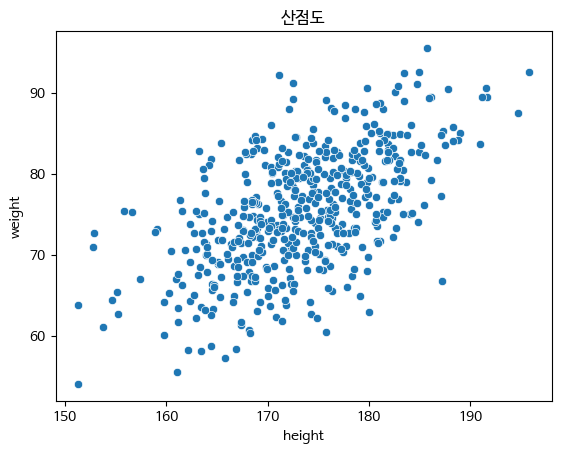

In [6]:
sns.scatterplot(data=body_data, x='height', y='weight')
plt.title("산점도")
plt.show()

### 2. 데이터 지정

In [7]:
# 키 컬럼을 5cm 단위로 나눠준다 => 범주형 변수 생성
body_data['height_bin'] = pd.cut(body_data['height'], bins=range(150, 200, 5))

# 몸무게 컬럼을 10kg 단위로 나눠준다 => 범주형 변수 생성
body_data['weight_bin'] = pd.cut(body_data['weight'], bins=range(30, 120, 10))

body_data

# ( -> = 이 없다 즉, 초과
# ] => = 이 있다 즉, 이하

,height,weight,height_bin,weight_bin
0,188.3,85.8,"(185, 190]","(80, 90]"
1,176.2,78.0,"(175, 180]","(70, 80]"
2,175.9,75.6,"(175, 180]","(70, 80]"
3,181.1,85.1,"(180, 185]","(80, 90]"
4,182.6,82.3,"(180, 185]","(80, 90]"
...,...,...,...,...
495,172.0,70.0,"(170, 175]","(60, 70]"
496,169.6,83.0,"(165, 170]","(80, 90]"
497,163.3,68.6,"(160, 165]","(60, 70]"
498,185.7,95.6,"(185, 190]","(90, 100]"


### 3. 막대 그래프: 키 구간별 평균 몸무게

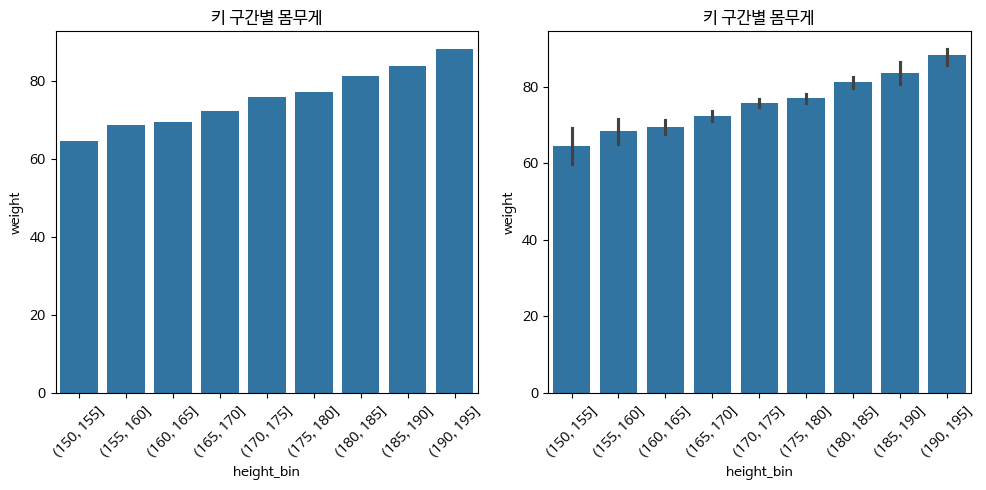

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=body_data, x='height_bin', y='weight', errorbar=None) # errorbar: 검은 선 삭제
plt.xticks(rotation=45) # rotation: x 축을 돌림
plt.title("키 구간별 몸무게")

plt.subplot(1, 2, 2)
sns.barplot(data=body_data, x='height_bin', y='weight')
plt.xticks(rotation=45) # rotation: x 축을 돌림
plt.title("키 구간별 몸무게")

plt.tight_layout()
plt.show()

### 4. seaborn 데이터 셋 목록

In [15]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 타이타닉 데이터 셋 불러오기

In [16]:
titanic_data = sns.load_dataset('titanic')
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 박스 플롯
- set_style(): 배경스타일 변경
    - white
    - dark
    - whitegrid
    - darkgrid
    - ticks

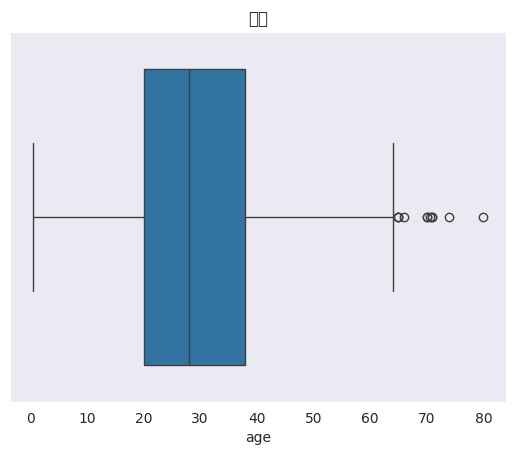

In [22]:
sns.set_style('dark')
sns.boxplot(data=titanic_data, x='age')
plt.title("나이")
plt.show()

### set_context() - 글씨 크기와 두께 조절
- paper : 논문 스타일 (기본)
- notebook
- talk : 발표 슬라이드용
    
- poster : 큰 폰트와 두꺼운 선 – 발표 포스터에 적합

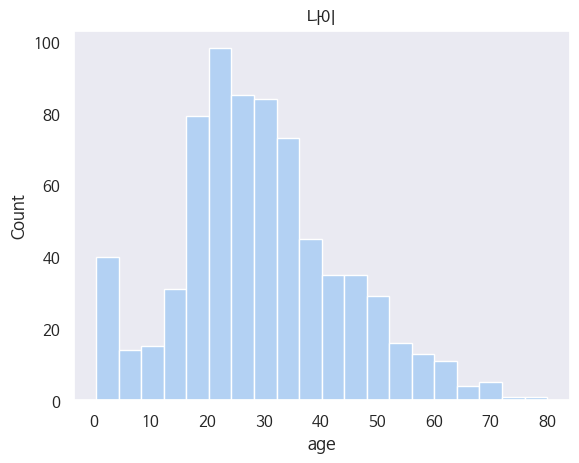

In [32]:
sns.set_context('notebook') #
sns.histplot(data=titanic_data, x='age')
plt.title("나이")
plt.show()

### 기본 색상 set_palette()

- 색상 테마 : deep, muted, bright, pastel, dark, colorblind
- 파라미터의 기본값은 deep
- Seaborn은 내장 색상 테마를 쉽게 적용할 수 있어 발표 목적에 따라 색감 조정 가능

- 명령어
    - sns.color_palette: 색상 리스트 설명
    - sns.palplot: 어떤 색인지 보여주기


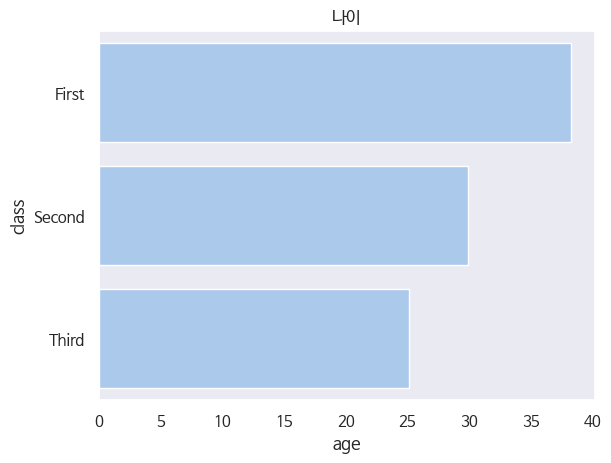

In [34]:
sns.set_palette(sns.color_palette('pastel'))
sns.barplot(data=titanic_data, x='age', y='class', errorbar=None)
plt.title("나이")
plt.show()

### 바이올린 플롯

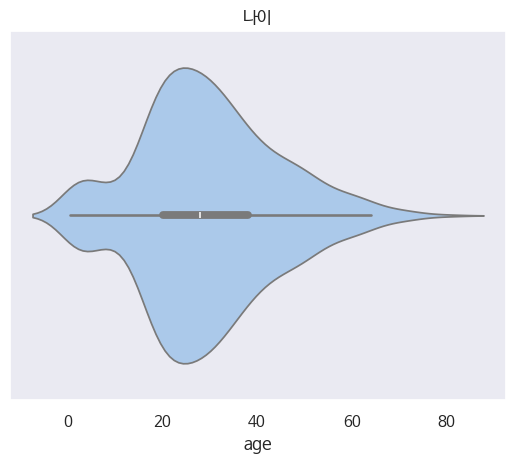

In [35]:
sns.violinplot(data=titanic_data, x='age')
plt.title("나이")
plt.show()

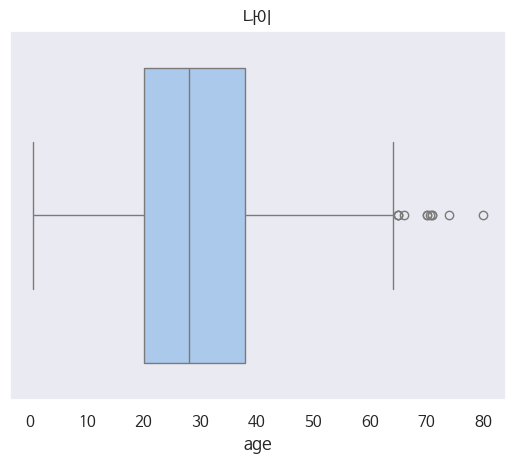

In [36]:
sns.boxplot(data=titanic_data, x='age')
plt.title("나이")
plt.show()

###  set_theme()
```python
set_theme (
    context = ' notebook' ,
    style = 'darkgrid' ,
    palette = 'deep' ,
    font = 'sans-serif',
    font_scale = 1 ,
    color_codes = True ,
    rc = None
    )
```

- contex, style, palette, font, font_scale, color_codes, rc



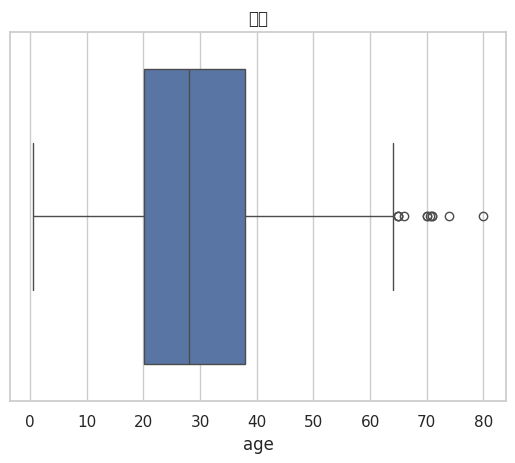

In [37]:
sns.set_theme(style='whitegrid') # , palette='pastel', font_scale=1.5

sns.boxplot(data=titanic_data, x='age')
plt.title("나이")
plt.show()

### 상관관계 분석 - 수치형 변수만 선택 ('number')

In [38]:
corr =titanic_data.select_dtypes(include='number').corr()
corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 히트맵

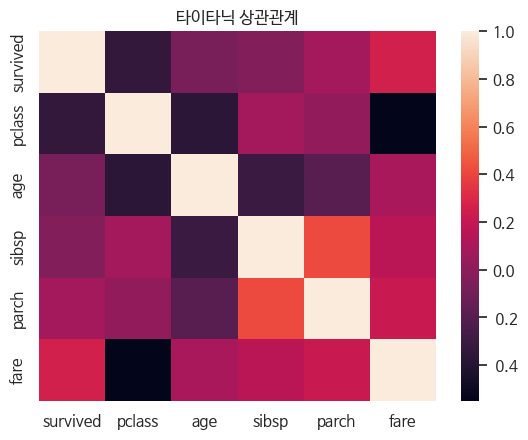

In [41]:
sns.heatmap(corr)
plt.title("타이타닉 상관관계")
plt.show()

### 히트맵 디벨롭
- annot (수치를 함께 표시)
- cmap='coolwarm': 음 -> 파란색 / 양 -> 빨간색

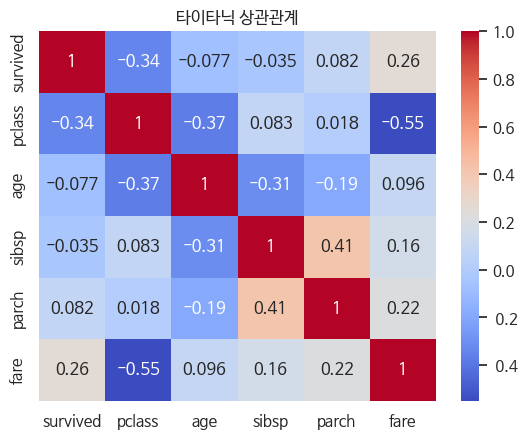

In [43]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("타이타닉 상관관계")
plt.show()

### 응용 히트맵
- 결측값(빠진 값) 여부 시각화

-isnull(): 결측치 찾는 함수
- yticklabels=False: y축 값 없애
- cbar=False -> 표 오른쪽꺼 없앰

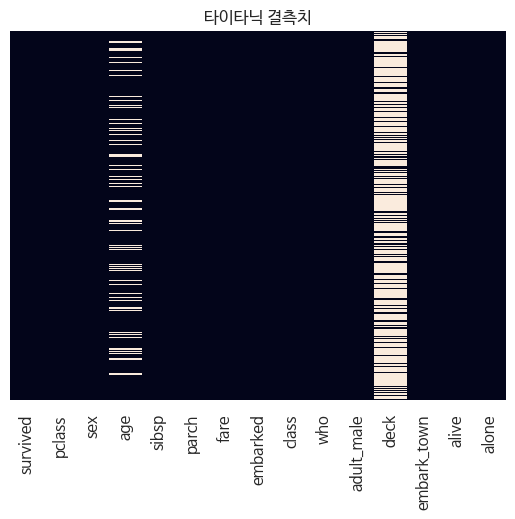

In [48]:
sns.heatmap(titanic_data.isnull(), cbar=False, yticklabels=False)
plt.title("타이타닉 결측치")
plt.show()